Random Walk apply تطبيق المشي العشوائي

In [1]:

import pandas as pd

df = pd.read_csv('C:/Users/PLUS VAIO/OneDrive/سطح المكتب/owid-covid-data.csv')
                


In [21]:
rand_df = df[df['location']=='United States']

In [25]:
rand_df.isnull()sum()

iso_code                                         0
continent                                        0
location                                         0
date                                             0
total_cases                                      0
new_cases                                      442
new_cases_smoothed                             447
total_deaths                                     0
new_deaths                                       0
new_deaths_smoothed                              5
total_cases_per_million                          0
new_cases_per_million                          442
new_cases_smoothed_per_million                 447
total_deaths_per_million                         0
new_deaths_per_million                           0
new_deaths_smoothed_per_million                  5
reproduction_rate                              640
total_tests                                    834
new_tests                                      834
total_tests_per_thousand       

In [26]:
rand_df.duplicated().sum()


0

In [30]:
rand_df = rand_df.dropna(subset = "new_cases_per_million")

In [31]:
rand_df.shape

(1232, 55)

In [33]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(rand_df['new_cases_per_million'])



In [34]:
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -3.6750308557437914
p-value: 0.00447839496486521
Critical Values:
	1%: -3.435761408287299
	5%: -2.863929614852828
	10%: -2.568042270495956


In [35]:
# تحليل النتائج
if result[1] > 0.05:
    print("\nالبيانات تتبع المشي العشوائي (بناءً على p-value > 0.05).")
    print("هذا يعني أن التنبؤات المستقبلية غير موثوقة.")
else:
    print("\nالبيانات ليست مشيًا عشوائيًا (بناءً على p-value <= 0.05).")
    print("هذا يعني أن السلسلة الزمنية ثابتة ويمكن التنبؤ بها.")


البيانات ليست مشيًا عشوائيًا (بناءً على p-value <= 0.05).
هذا يعني أن السلسلة الزمنية ثابتة ويمكن التنبؤ بها.


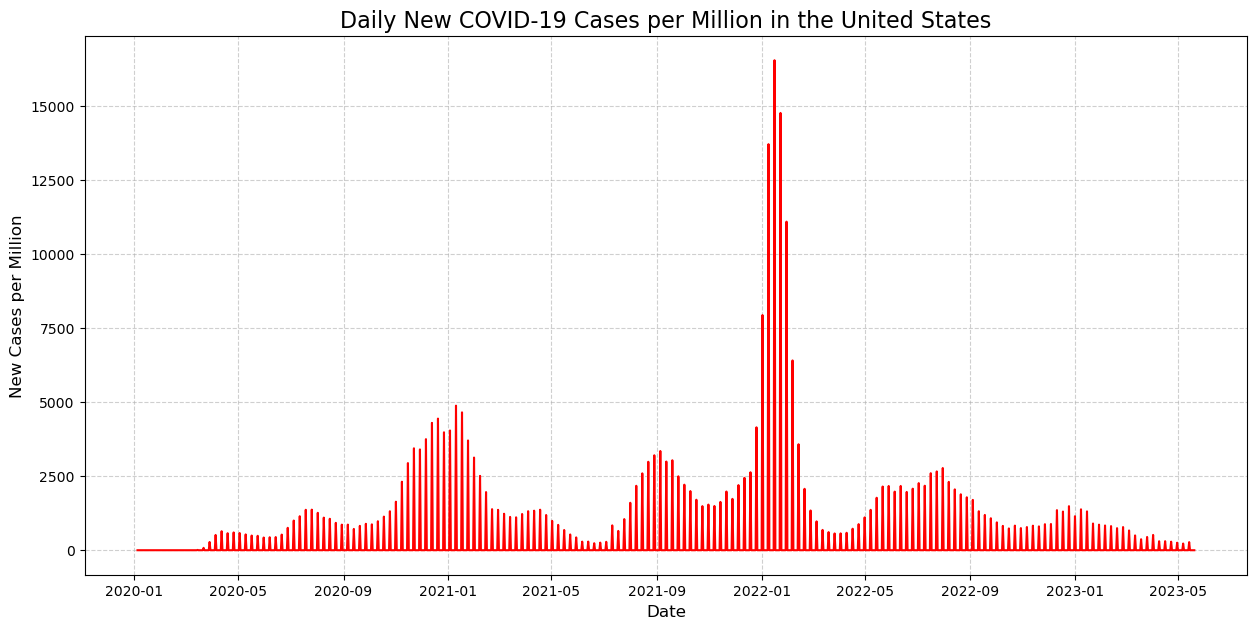

In [39]:
import matplotlib.pyplot as plt
# افترض أن اسم الـ DataFrame هو df واسم العمود هو 'new_cases_per_million'
# تأكد من أن فهرس الـ DataFrame (Index) هو التواريخ
# قم بتغيير نوع العمود 'date' إلى صيغة التاريخ إذا لم يكن كذلك
rand_df['date'] = pd.to_datetime(rand_df['date'])

# قم بتعيين عمود 'date' كفهرس للـ DataFrame
rand_df = rand_df.set_index('date')

# إنشاء الرسم البياني
plt.figure(figsize=(15, 7)) # يمكنك تعديل الحجم حسب الحاجة
plt.plot(rand_df.index, rand_df['new_cases_per_million'], color='red')
plt.title('Daily New COVID-19 Cases per Million in the United States', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('New Cases per Million', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

top 10 countries by total deaths latest date
أعلى 10 دول من حيث إجمالي الوفيات حسب آخر تاريخ



